# DAYCON COIN TRADER

### 암호화폐 가격 예측

#### 10가지 종류의 암호화폐 가격을 예측하여 가장 수익율이 높은 모델 만들기

#### 데이터셋

- **train_x_df** : 임의의 시점부터 2020년 12월 31일까지 10가지 종류의 암호화폐 분단위 정보를 가공한 데이터

- **train_y_df** : 임의의 시점부터 2020년 12월 31일까지 10가지 종류의 암호화폐 분단위 가격정보를 가공한 데이터

- **test_x_df** : 2021년 1월 1일부터 임의의 시점까지 10가지 종류의 암호화폐 분단위 가격정보를 가공한 데이터


- 학습용 데이터는 10가지 종류의 코인을 포함하는 7362가지의 sample이 담겨있으며 train_x_df는 입력 23시간 동안의 분단위 데이터, train_y_df는 출력 2시간 동안의 분단위 데이터이다.

- test_x는 train_x과 동일한 구성을 갖는 529가지의 sample을 의미하며 해당 sample_id에 대해 매수량(buy_quantity)와 매도 시점(sell_time)을 결정해야한다.

### 파일 불러오기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_x_df = pd.read_csv('/content/drive/MyDrive/Daycon/train_x_df.csv')
train_y_df = pd.read_csv('/content/drive/MyDrive/Daycon/train_y_df.csv')
test_x_df = pd.read_csv('/content/drive/MyDrive/Daycon/test_x_df.csv')

In [5]:
train_x_df.head()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,7,1.010004,1.010004,1.009612,1.010004,8.382875e+05,43160.632812,451.157288,7.326834e+05,37725.183594
1,0,1,7,1.009808,1.009808,1.009808,1.009808,1.622420e+05,8352.220703,39.231071,0.000000e+00,0.000000
2,0,2,7,1.009808,1.010200,1.009808,1.010200,1.664967e+04,857.377808,58.846603,1.664967e+04,857.377808
3,0,3,7,1.010200,1.011181,1.010200,1.011181,2.586971e+06,133310.343750,431.541779,2.189147e+06,112811.046875
4,0,4,7,1.010985,1.010985,1.010200,1.010200,1.129996e+06,58216.867188,176.539810,0.000000e+00,0.000000


In [6]:
train_y_df.head()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,7,1.000392,1.000588,1.000392,1.000588,8.305119e+05,42356.179688,137.308746,8.305119e+05,42356.179688
1,0,1,7,1.000588,1.001177,1.000392,1.001177,5.320066e+05,27140.638672,294.233032,4.882738e+05,24909.861328
2,0,2,7,1.001177,1.001177,1.001177,1.001177,5.113770e+05,26100.681641,58.846603,5.113770e+05,26100.681641
3,0,3,7,1.001177,1.001373,1.001177,1.001373,1.134853e+06,57929.410156,137.308746,1.095514e+06,55921.156250
4,0,4,7,1.000981,1.000981,0.999804,1.000196,5.801173e+06,295872.343750,666.928162,9.911239e+05,50528.589844


In [7]:
test_x_df.head()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,7,1.003541,1.007110,1.003541,1.006090,486928.96875,182543.687500,332.671570,287449.968750,107758.375000
1,0,1,7,1.006117,1.006331,1.004829,1.005634,824485.37500,309019.750000,407.790955,560290.250000,210005.125000
2,0,2,7,1.005929,1.005983,1.004266,1.005366,478614.56250,179301.843750,276.332031,214270.265625,80283.554688
3,0,3,7,1.005044,1.005956,1.004910,1.005795,334366.84375,125305.117188,166.335785,56401.246094,21135.490234
4,0,4,7,1.005580,1.006466,1.005285,1.005929,560916.68750,210316.796875,303.160370,138711.703125,52010.964844


### 변수 설명

|<center>변수명|<center>변수설명|
|:------:|:-------:|
|<center>**sample_id**| <center>개별 샘플의 인덱스|
|<center>**time**|<center>x_df는 0분 ~ 1379분, y_df는 0분 ~ 119분의 값. 동일한 샘플 내 시간 정보|
|<center>**coin_index**|<center>10가지 종류의 코인에 대한 비식별화 인덱스 (0 ~9)|
|<center>**open**|<center>open price|
|<center>**high**|<center>high price|
|<center>**low**|<center>low price|
|<center>**close**|<center>close price|
|<center>**volume**|<center>거래량|
|<center>**quote_av**|<center>quote asset volume|
|<center>**trades**|<center>거래 건 수|
|<center>**tb_base_av**|<center>taker buy base asset volume|
|<center>**tb_quote_av**|<center>taker buy quote asset volume|

In [8]:
train_x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10159560 entries, 0 to 10159559
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   sample_id    int64  
 1   time         int64  
 2   coin_index   int64  
 3   open         float64
 4   high         float64
 5   low          float64
 6   close        float64
 7   volume       float64
 8   quote_av     float64
 9   trades       float64
 10  tb_base_av   float64
 11  tb_quote_av  float64
dtypes: float64(9), int64(3)
memory usage: 930.1 MB


In [9]:
train_y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883440 entries, 0 to 883439
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sample_id    883440 non-null  int64  
 1   time         883440 non-null  int64  
 2   coin_index   883440 non-null  int64  
 3   open         883440 non-null  float64
 4   high         883440 non-null  float64
 5   low          883440 non-null  float64
 6   close        883440 non-null  float64
 7   volume       883440 non-null  float64
 8   quote_av     883440 non-null  float64
 9   trades       883440 non-null  float64
 10  tb_base_av   883440 non-null  float64
 11  tb_quote_av  883440 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 80.9 MB


In [10]:
test_x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730020 entries, 0 to 730019
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sample_id    730020 non-null  int64  
 1   time         730020 non-null  int64  
 2   coin_index   730020 non-null  int64  
 3   open         730020 non-null  float64
 4   high         730020 non-null  float64
 5   low          730020 non-null  float64
 6   close        730020 non-null  float64
 7   volume       730020 non-null  float64
 8   quote_av     730020 non-null  float64
 9   trades       730020 non-null  float64
 10  tb_base_av   730020 non-null  float64
 11  tb_quote_av  730020 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 66.8 MB


In [11]:
train_x_df.describe()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
count,1.015956e+07,1.015956e+07,1.015956e+07,1.015956e+07,1.015956e+07,1.015956e+07,1.015956e+07,1.015956e+07,1.015956e+07,1.015956e+07,1.015956e+07,1.015956e+07
mean,3.680500e+03,6.895000e+02,5.495925e+00,1.000988e+00,1.001753e+00,1.000196e+00,1.000980e+00,7.657862e+05,4.268907e+04,1.179676e+02,3.647911e+05,2.106137e+04
std,2.125226e+03,3.983716e+02,2.940005e+00,3.895120e-02,3.900216e-02,3.889973e-02,3.892255e-02,9.341042e+06,2.146420e+05,4.936206e+02,5.268894e+06,1.117901e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,8.903663e-02,5.540227e-01,8.903663e-02,5.540227e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.840000e+03,3.447500e+02,4.000000e+00,9.871310e-01,9.878350e-01,9.863969e-01,9.871426e-01,5.047751e-02,3.126231e+01,7.715160e-02,5.671815e-03,1.066213e+01
50%,3.680500e+03,6.895000e+02,6.000000e+00,1.000000e+00,1.000556e+00,9.994500e-01,1.000000e+00,3.231240e+00,3.220208e+02,7.796185e-01,1.039115e+00,1.152704e+02
75%,5.521000e+03,1.034250e+03,8.000000e+00,1.012693e+00,1.013415e+00,1.011950e+00,1.012669e+00,4.258415e+04,1.254463e+04,5.641976e+01,9.016594e+03,4.863686e+03
max,7.361000e+03,1.379000e+03,9.000000e+00,2.066901e+00,4.451831e+00,2.066901e+00,2.066901e+00,7.398036e+09,3.705497e+07,6.257862e+04,7.340513e+09,2.320023e+07


In [12]:
train_y_df.describe()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
count,883440.000000,883440.000000,883440.000000,883440.000000,883440.000000,883440.000000,883440.000000,8.834400e+05,8.834400e+05,883440.000000,8.834400e+05,8.834400e+05
mean,3680.500000,59.500000,5.495925,1.000065,1.000832,0.999272,1.000059,7.399341e+05,4.162687e+04,115.143382,3.529742e+05,2.053159e+04
std,2125.227524,34.639833,2.940006,0.012062,0.012122,0.012172,0.012157,8.463690e+06,1.924362e+05,443.679342,4.836148e+06,1.019837e+05
min,0.000000,0.000000,0.000000,0.776689,0.778169,0.760567,0.774648,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,1840.000000,29.750000,4.000000,0.996483,0.997047,0.995809,0.996422,5.079032e-02,3.136911e+01,0.077189,5.787930e-03,1.067757e+01
50%,3680.500000,59.500000,6.000000,1.000000,1.000416,0.999541,1.000000,3.267469e+00,3.230985e+02,0.783415,1.043598e+00,1.159318e+02
75%,5521.000000,89.250000,8.000000,1.003615,1.004268,1.003031,1.003666,4.219783e+04,1.261572e+04,56.521740,8.772491e+03,4.886511e+03
max,7361.000000,119.000000,9.000000,1.243545,1.249481,1.231673,1.243545,2.085937e+09,1.323100e+07,44132.230469,1.908554e+09,8.438416e+06


In [13]:
test_x_df.describe()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
count,730020.000000,730020.000000,730020.000000,730020.000000,730020.000000,730020.000000,730020.000000,7.300200e+05,7.300200e+05,730020.000000,7.300200e+05,7.300200e+05
mean,264.000000,689.500000,4.491493,0.991427,0.993138,0.989688,0.991434,7.801768e+05,1.992196e+05,313.488285,3.903638e+05,9.925072e+04
std,152.708978,398.371854,2.868319,0.066288,0.066522,0.066000,0.066239,3.738390e+06,8.574118e+05,977.688953,2.005648e+06,4.268118e+05
min,0.000000,0.000000,0.000000,0.607767,0.609716,0.606567,0.608217,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,132.000000,344.750000,2.000000,0.963017,0.964617,0.961381,0.963066,8.064378e-01,5.264895e+02,0.607591,3.648973e-01,2.334793e+02
50%,264.000000,689.500000,4.000000,0.995372,0.996856,0.993898,0.995397,3.989354e+02,5.109016e+03,9.878845,1.658845e+02,2.198869e+03
75%,396.000000,1034.250000,7.000000,1.021444,1.023017,1.019826,1.021421,3.602226e+05,9.049191e+04,268.041229,1.446413e+05,4.106598e+04
max,528.000000,1379.000000,9.000000,2.129188,2.167028,1.950575,2.129188,4.738079e+08,9.179647e+07,79387.242188,2.255709e+08,3.681243e+07


In [14]:
train_x_df.shape

(10159560, 12)

### 암호화폐별 분류

- train_x데이터의 시간은 0~1379분까지 고유값은 7362개

- train_y데이터의 시간은 0~119분까지 고유값은 7362개

- test데이터의 시간은 0~1379분까지 고유값은 529개

In [15]:
def change_array(x) :
    coin_idx = x.iloc[:,2:].shape[1]
    time_idx = len(x.time.value_counts())
    sample_idx = len(x.sample_id.value_counts())
    array_df = x.iloc[:,2:].values.reshape([sample_idx,time_idx,coin_idx])
    return array_df

In [16]:
train_x_array = change_array(train_x_df)
train_y_array = change_array(train_y_df)
test_x_array = change_array(test_x_df)

암호화폐 10개의 시간(컬럼)별 데이터 정리<br>
(행(sample_idx), 열(시간),분단위 10가지 정보)

In [17]:
print(train_x_array.shape)
print(train_y_array.shape)
print(test_x_array.shape)

(7362, 1380, 10)
(7362, 120, 10)
(529, 1380, 10)


## 1번째 코인

In [18]:
# 전체 시간 = train 전체 시간 + test 전체 시간
def plot_series(x_series, y_series) :
    plt.plot(x_series)
    plt.plot(np.arange(len(x_series),len(y_series) + len(x_series)),y_series)


In [19]:
idx = 0 # sample_id
idx_col = 1 # 1 : open , 2 : high
x_series = train_x_array[idx,:,idx_col]
y_series = train_y_array[idx,:,idx_col]


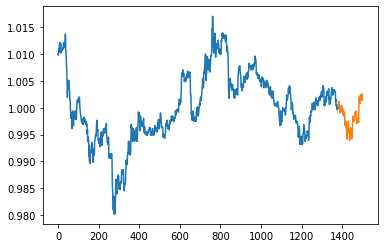

In [20]:
# 1번째 코인 train,test 그래프
plot_series(x_series,y_series)

### prophet

- 시계열 예측 라이브러리 활용

In [21]:
# data 날짜 추가
import datetime

In [22]:
start_time = "2020-12-31 00:00:00"
time_start = datetime.datetime.strptime(start_time,"%Y-%m-%d %H:%M:%S")
print(time_start)


2020-12-31 00:00:00


In [23]:
ts_df = pd.DataFrame()

In [24]:
ts_df['ds'] = [time_start + datetime.timedelta(minutes = min_time) for min_time in range(1,len(x_series)+1)]
ts_df['y'] = x_series

In [25]:
ts_df.head()

,ds,y
0,2020-12-31 00:01:00,1.010004
1,2020-12-31 00:02:00,1.009808
2,2020-12-31 00:03:00,1.009808
3,2020-12-31 00:04:00,1.010200
4,2020-12-31 00:05:00,1.010985


In [26]:
from fbprophet import Prophet

In [27]:
# prophet 모델 실행 : 아무 옵션도 추가 안함.
m = Prophet()
m.fit(ts_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
# 적합시킨 모델의 예측값을 future에 할당
future = m.make_future_dataframe(periods = 120, freq = 'min')
forecast = m.predict(future)

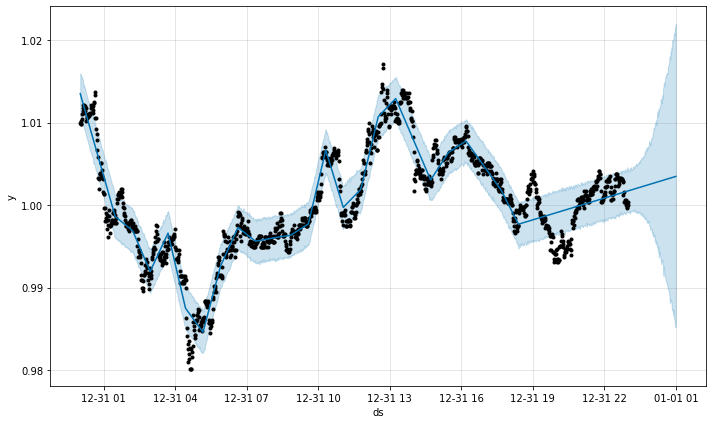

In [29]:
fig1 = m.plot(forecast)

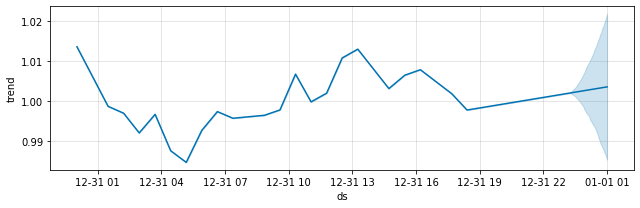

In [30]:
  fig2 = m.plot_components(forecast)

In [31]:
# 모델 파라미터 조절
# 연간,주간,일간 계절성은 False
model = Prophet(seasonality_mode = 'multiplicative', 
                yearly_seasonality = False,
                weekly_seasonality = False,
                daily_seasonality = False,
                changepoint_prior_scale = 0.1 , # trend의 변동성을 조절, 너무 낮출 경우 underfitting, 높일 경우 overfitting 
                changepoint_range = 0.9) # overfitting을 피하기위해 train_data 80%만 사용

In [32]:
# 조절한 모델
model.fit(ts_df)

In [33]:
future = model.make_future_dataframe(periods = 120, freq = 'min')
forecast = model.predict(future)

In [34]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-31 00:01:00,1.014421,1.012109,1.016994,1.014421,1.014421,0.0,0.0,0.0,0.0,0.0,0.0,1.014421
1,2020-12-31 00:02:00,1.014207,1.011875,1.016618,1.014207,1.014207,0.0,0.0,0.0,0.0,0.0,0.0,1.014207
2,2020-12-31 00:03:00,1.013993,1.011706,1.016332,1.013993,1.013993,0.0,0.0,0.0,0.0,0.0,0.0,1.013993
3,2020-12-31 00:04:00,1.013779,1.011583,1.016147,1.013779,1.013779,0.0,0.0,0.0,0.0,0.0,0.0,1.013779
4,2020-12-31 00:05:00,1.013565,1.011401,1.016088,1.013565,1.013565,0.0,0.0,0.0,0.0,0.0,0.0,1.013565


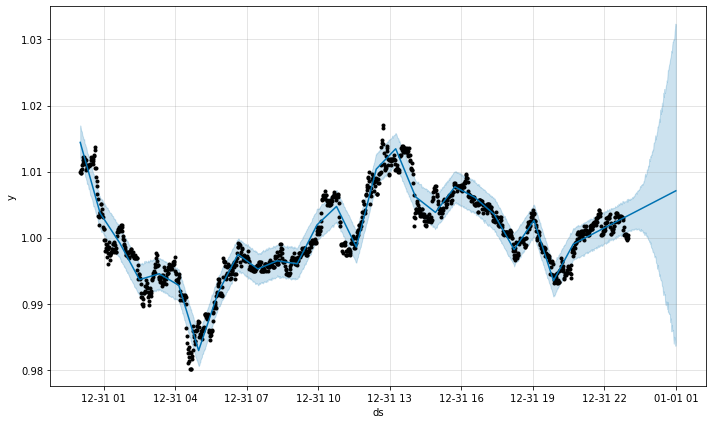

In [35]:
# mulitplicative, train 범위 조절, trend scale 조절
# 아직 계절성 추가를 안해줌, 시간 별 계절성을 어떻게 추가할지 고민해볼것(add_seasonality)
fig1 = model.plot(forecast)

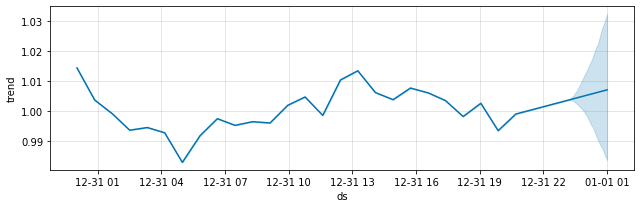

In [36]:
fig2 = model.plot_components(forecast)

In [37]:
# 모델 파라미터 조절
# 연간,주간,일간 계절성은 False
model = Prophet(seasonality_mode = 'multiplicative', 
                yearly_seasonality = False,
                weekly_seasonality = False,
                daily_seasonality = False,
                changepoint_prior_scale = 0.1 , # trend의 변동성을 조절, 너무 낮출 경우 underfitting, 높일 경우 overfitting 
                changepoint_range = 0.9) # overfitting을 피하기위해 train_data 80%만 사용

In [38]:
model.add_seasonality(name = 'hours_to_mins', period = 60, fourier_order = 5)

In [39]:
model.fit(ts_df)

In [40]:
future = model.make_future_dataframe(periods = 120, freq = 'min')
forecast = model.predict(future)

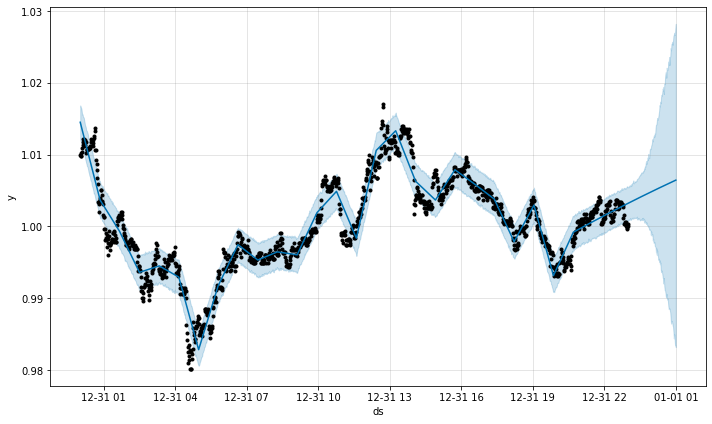

In [41]:
fig1 = model.plot(forecast)